## Importing Necessary Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [34]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Insight: This dataset contains 418 rows. 

## Checking for Duplicated and Null values

In [36]:
df.duplicated().sum()

0

In [37]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Insight: In this dataset, Age column has 86, Fare column has 1 and Cabin column has 327 null values. Since Cabin column contains large number of null values, so it is not a good feature for EDA and Model training.

## Dropping the column Cabin
## Filling other null values with their corresponding mean values.

In [38]:
df.drop(columns=['Cabin'], axis = 1, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

## Dropping the PassengerId, Ticket and Name column as it is not useful in analysis.

In [39]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


## Visualization

Text(1.0, 1.0, 'Class wise counting of Passengers')

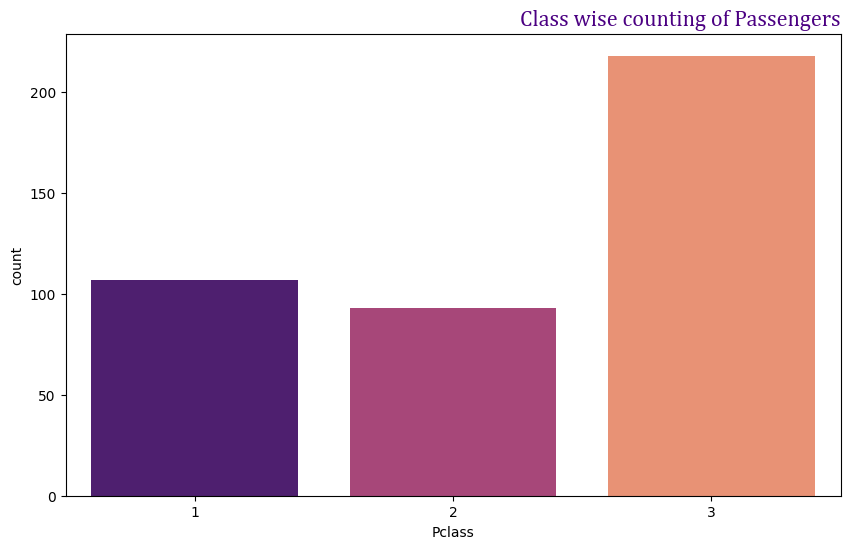

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Pclass', palette='magma')
plt.title("Class wise counting of Passengers", loc = 'right', color='indigo', font='cambria', fontsize=16)

Insight: Least availed passengers is in class 2 and most availed passengers is in class 3

<Axes: xlabel='Age', ylabel='Count'>

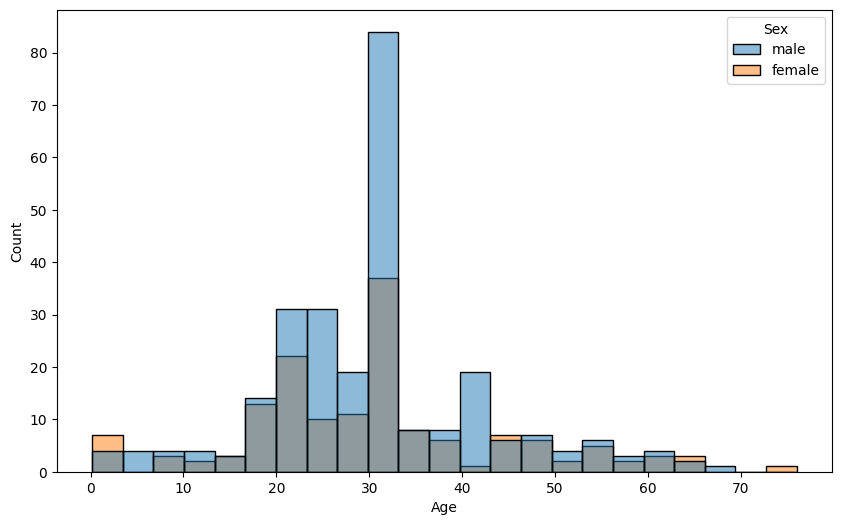

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Sex')

Insight: Highest count of the passengers availed is between the age of 30 to 33. Most aged passenger availed is a female and is above 70. Most of the passengers availed is male.

Text(1.0, 1.0, 'Embark distribution')

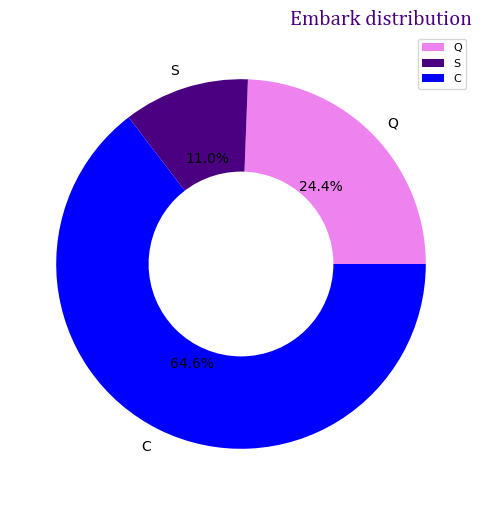

In [53]:
plt.figure(figsize=(10, 6))
plt.pie(df.groupby('Embarked').count()['Fare'], labels=df['Embarked'].unique(), autopct='%1.1f%%', colors=['violet', 'indigo', 'blue'])

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(fontsize=8)
plt.title("Embark distribution", color='indigo', font='cambria', fontsize=15, loc='right')

## Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

## Model training

#### Splitting x and y

In [64]:
x = df.drop(columns='Survived', axis=1)
y = df['Survived']

#### Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((292, 7), (292,), (126, 7), (126,))

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

clf = RandomForestClassifier()
params = {
    'max_depth': [1, 2, 3, 5, 10, None],
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy']
}

model = GridSearchCV(clf, param_grid=params, cv=5, verbose=3, scoring='accuracy')
model.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.879 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=100;, score=1.000 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=100;, score=1.000 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=100;, score=1.000 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.776 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.828 total time=   0.2s
[CV 1/5] END criterion=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 10, None],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=3)

In [68]:
model.best_score_, model.best_params_

(1.0, {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50})

## Prediction

In [67]:
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[85  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

